In [71]:
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



Model: RandomForestClassifier
Accuracy: 73.36% ± 2.96%
Recall: 84.72% ± 3.00%
Confusion Matrix:


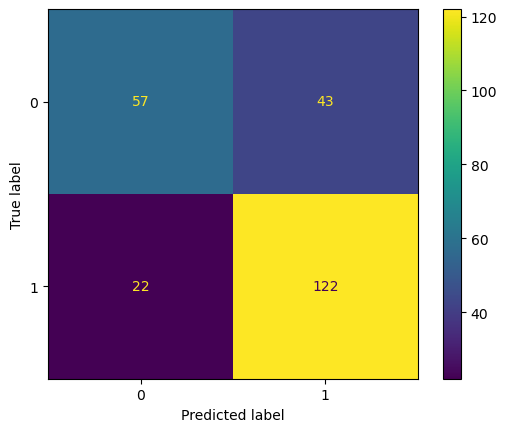

In [73]:
df_test_data = pd.read_csv('test_25_people_data.csv')

model_log = pd.read_pickle('final_form_of_repository/models/groupR_log_regr_classifier.sav')
model_random_forest = pd.read_pickle('final_form_of_repository/models/groupR_random_forest_classifier.sav')
model_knn = pd.read_pickle('final_form_of_repository/models/groupR_knn_classifier.sav')
pca_reload = pd.read_pickle('final_form_of_repository/models/pca.sav')
scaler_reload, features = pd.read_pickle('final_form_of_repository/models/scaler.sav')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

X_scaled_test_data = scaler_reload.transform(X_test_data)


X_scaled_pca = pca_reload.transform(X_scaled_test_data)

pred_list_model_log_proba = model_log.predict_proba(X_scaled_test_data)
pred_list_model_tree_proba = model_random_forest.predict_proba(X_scaled_test_data)
pred_list_model_knn_proba = model_knn.predict_proba(X_scaled_pca)

n_models=1

pred_list_model_log_proba_norm = pred_list_model_log_proba/n_models
pred_list_model_random_tree_proba_norm = pred_list_model_tree_proba/n_models
pred_list_model_knn_proba_norm = pred_list_model_knn_proba/n_models

#combined_proba = pred_list_model_log_proba_norm + pred_list_model_random_tree_proba_norm + pred_list_model_knn_proba_norm
combined_proba = pred_list_model_random_tree_proba_norm

threshold_proba = 0.5


correct = 0
wrong = 0
cancer = 0
not_cancer = 0

#Confusion matrix
TP = 0
FP = 0
TN = 0
FN = 0
for x in range(len(combined_proba)):
    no =  combined_proba[x][0]
    yes = combined_proba[x][1]
    if yes > threshold_proba:
        cancer += 1
        if 1 == y_test_data[x]:
            TP += 1
            correct += 1
        else:
            FP += 1
            wrong +=1
    else:
        not_cancer += 1
        if 0 == y_test_data[x]:
            TN += 1
            correct += 1
        else:
            FN += 1
            wrong +=1
acc = f'{round(((correct/(correct+wrong))*100),2)}% \u00B1 2.96%'
recall_score = f'{round(((TP/(TP+FN))*100), 2)}% \u00B1 3.00%'
confusion_matrix = np.matrix([[TN, FP], [FN, TP]])
#print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', acc)
print('Model: RandomForestClassifier')
print('Accuracy:', acc)
print('Recall:', recall_score)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=model_knn.classes_)
disp.plot();


In [172]:
meta_data = pd.read_csv('/Users/sunechristiansen/Downloads/metadata.csv')
our_data = pd.read_csv('train_data.csv')

new_df = our_data.copy()

# Create a new column in our_data for the modified IDs
our_data['modified_id'] = our_data['Name_Of_Picture'] + '.png'

# Filter meta_data based on these modified IDs
filtered_meta_data = meta_data[meta_data['img_id'].isin(our_data['modified_id'])]

new_df['itch'] = filtered_meta_data['itch']
new_df['itch'] = filtered_meta_data['skin_cancer_history']
new_df['itch'] = filtered_meta_data['bleed']





KeyError: 'itch'

In [1]:
import pandas as pd

# Load the data
meta_data = pd.read_csv('/Users/sunechristiansen/Downloads/metadata.csv')
our_data = pd.read_csv('train_data.csv')

# Create a new DataFrame as a copy of our_data
new_df = our_data.copy()

# Append '.png' to the names in 'Name_Of_Picture' to match the IDs in meta_data
new_df['modified_id'] = new_df['Name_Of_Picture'] + '.png'

# Filter meta_data based on these modified IDs
filtered_meta_data = meta_data[meta_data['img_id'].isin(new_df['modified_id'])]

new_df = pd.merge(new_df, filtered_meta_data[['itch', 'skin_cancer_history', 'bleed', 'img_id']], left_on='modified_id', right_on='img_id', how='left')

len(new_df)


778

In [4]:
len(new_df)
new_df = new_df.dropna()
len(new_df)

626

f_orgnl - best 12, th=0.435: 0.6993865030674846; rf (): 0.7310657596371882; best k-nn (33): 0.6229326513213981
f_op_1 - best : ; rf: ; best k-nn (): 
f_op_2 - best : ; rf: ; best k-nn (): 
f_op_3 - best : ; rf: ; best k-nn (): 

In [ ]:
# Load the data
sti_features = 'train_75_people_data.csv'
#sti_features ='features_optimized_1.csv'
#sti_features ='features_optimized_2.csv'
#sti_features ='features_optimized_3.csv'

data = pd.read_csv(sti_features)

In [ ]:


# Assuming 'data' and 'y' are already defined
#X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'black_presence', 'atypicturesal', 'blue-whiteveils', 'asymmetry_values']]
X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
#X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y=data['cancer_or_not']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


selector = RFE(LogisticRegression(), n_features_to_select=12) # Selects the top 5 features
X_selected = selector.fit_transform(X_scaled, y)
clf = LogisticRegression().fit(X_selected, y)
# Train the model




# Get probabilities of the positive class
probabilities = clf.predict_proba(X_selected)[:, 1]
acctest=False
if acctest:
    #Accuracy test
    threshold = 0.16
    step=0.01

    accuracy_dict = dict()
    recall_dict = dict()
    
    while(threshold<0.5):
        predictions = np.where(probabilities >= threshold, 1, 0)  # 1 if >= 0.6 else 0
    
        accuracy_dict[accuracy_score(y, predictions)]=threshold
        recall_dict[recall_score(y, predictions)]= threshold

        print("Accuracy:", accuracy_score(y, predictions))
        print("Recall:", recall_score(y, predictions))
        print("threshold: ",threshold)
        print()
    
        threshold+=step
    
    best_accuracy = accuracy_dict[max(accuracy_dict.keys())]
    print(recall_dict[max(recall_dict.keys())])
 
#
threshold = 0.4
predictions = np.where(probabilities >= threshold, 1, 0)  # 1 if >= 0.6 else 0


# Print new predictions with custom threshold
#print(predictions)

# Evaluate model
print("Accuracy:", accuracy_score(y, predictions))
print("Precision:", precision_score(y, predictions))
print("Recall:", recall_score(y, predictions))
print("F1 Score:", f1_score(y, predictions))
print(threshold)

seleced_features_after = []
for x in range(len(selector.support_)):
    if selector.support_[x] == True:
        seleced_features_after.append(X.columns.values[x])
        
#train model with best found parameters and save it
final_model = clf
#final_model.fit(X_train, y_train)
with open(f'log_regr_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)
      
seleced_features_after

In [ ]:
df_test_data = pd.read_csv('test_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
#X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_log = pd.read_pickle('./knn7_model.pkl')

pred_list = model_log.predict(X_scaled_test_data)

correct = 0
wrong = 0

for x in range(len(pred_list)):
    if pred_list[x] == y_test_data[x]:
        correct += 1
    else:
        wrong +=1

print(correct, wrong, correct/(correct+wrong))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Confusion Matrix
conf_matrix = confusion_matrix(y, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y, predictions)
print("Classification Report:")
print(class_report)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the data
#sti_features = '/Users/sunechristiansen/sune/ds_project/mdasm-2024/features.csv'
#data = pd.read_csv(sti_features)
#data = combined_df

# Separate features and target
feature_columns= ['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']
#feature_columns = ['H_value', 'V_value', 'white_presence', 'blue-white_veil', 'asymmetry_values']
X = data[feature_columns]
y = data['cancer_or_not']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Initialize the scaler
scaler = StandardScaler()
# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data with the same scaler
X_test_scaled = scaler.transform(X_test)


accuracies = list()
n=15
classifier="rf"

for i in range(n):
    # Initialize the Random Forest classifier
    rf_classifier=0
    if classifier == "rf":
        rf_classifier = RandomForestClassifier(n_estimators=1000, max_depth=5, bootstrap=True)
    elif classifier == "kn":
        rf_classifier = KNeighborsClassifier(n_neighbors=25)
    # Train the model using the scaled feature columns
    rf_classifier.fit(X_train_scaled, y_train)
    # Make predictions using the scaled test feature columns
    predictions = rf_classifier.predict(X_test_scaled)
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    #print(f'Accuracy of the Random Forest classifier is: {accuracy:.2f}')
print(sum(accuracies)/len(accuracies))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


k_list = list(range(1,30,2)) # creating list of K for KNN
knn_cv_scores = [] # creating list of cv scores
best_knn_param=0 # best number of neighbors found after cv
best_score=0

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy') #perform cv
    knn_cv_scores.append(scores.mean())
    if knn_cv_scores[-1]>best_score: #find best score parameters
        best_score=knn_cv_scores[-1]
        best_knn_param=k

# changing to misclassification error
MSE = [1 - x for x in knn_cv_scores]

#ploting results of cv
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.savefig("knn_performance")
plt.show()

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)
print(max(knn_cv_scores))

#train model with best found parameters and save it
'''final_model = KNeighborsClassifier(n_neighbors=best_knn_param)
final_model.fit(X_scaled, y)
with open(f'knn{best_knn_param}_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)'''

print(f"knn{best_knn_param}_model saved successfully!")

In [ ]:
final_model = KNeighborsClassifier(n_neighbors=best_knn_param)
final_model.fit(X_scaled, y)
with open(f'knn{best_knn_param}_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

In [ ]:
rf_cv_scores = [] # creating list of cv scores
rf_list=list(range(1,10)) # creating list of depths for rf
best_rf_depth=0  # best depth found after cv
best_score=0
for d in rf_list:
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=d, bootstrap=True)
    scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy') #perform cv
    rf_cv_scores.append(scores.mean())
    if rf_cv_scores[-1]>best_score: #find best score parameters
        best_score=rf_cv_scores[-1]
        best_rf_depth=d

# changing to misclassification error
MSE = [1 - x for x in rf_cv_scores]

#ploting results of cv
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal tree depth', fontsize=20, fontweight='bold')
plt.xlabel('Depth of threes', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(rf_list, MSE)

plt.show()

best_rf = rf_list[MSE.index(min(MSE))]
print("The optimal depth is %d." % best_rf)
print(max(rf_cv_scores))


#train model with best found parameters and save it
final_tree=RandomForestClassifier(n_estimators=4500, max_depth=8, bootstrap=True)
final_tree.fit(X_train, y_train)

with open(f'depth{best_rf_depth}_tree.pkl', 'wb') as f:
    pickle.dump(final_tree, f)

print(f"depth{best_rf_depth}_tree saved successfully!")

In [ ]:
feature_columns= ['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']
#feature_columns = ['H_value', 'V_value', 'white_presence', 'blue-white_veil', 'asymmetry_values']
X = data[feature_columns]
y = data['cancer_or_not']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Initialize the scaler
scaler = StandardScaler()
# Fit on training data and transform it
X_scaled = scaler.fit_transform(X_train)
#train model with best found parameters and save it

n_trees=96
n_depth=10
final_tree=RandomForestClassifier(n_estimators=n_trees, max_depth=n_depth, bootstrap=True)
final_tree.fit(X_scaled, y_train)

with open(f'depth{n_depth}_tree.pkl', 'wb') as f:
    pickle.dump(final_tree, f)

print(f"depth{n_depth}_tree saved successfully!")

In [ ]:
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./depth7_tree.pkl')
model_knn = pd.read_pickle('./knn17_model.pkl')


pred_list_model_log = model_log.predict(X_scaled_test_data)
pred_list_model_random_tree = model_random_tree.predict(X_scaled_test_data)
pred_list_model_knn = model_knn.predict(X_scaled_test_data)

correct = 0
wrong = 0
cancer = 0
not_cancer = 0

#Confusion matrix
TP = 0
FP = 0
TN = 0
FN = 0

for x in range(len(pred_list_model_log)):
    if np.sum(pred_list_model_log[x]+pred_list_model_random_tree[x]+pred_list_model_knn[x]) > 1.5:
        cancer += 1
        if 1 == y_test_data[x]:
            TP += 1
            correct += 1
        else:
            FP += 1
            wrong +=1
    else:
        not_cancer += 1
        if 0 == y_test_data[x]:
            TN += 1
            correct += 1
        else:
            FN += 1
            wrong +=1

confusion_matrix = np.matrix([[TN, FP], [FN, TP]])

print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', correct/(correct+wrong))
print("Confusion Matrix:")
print(confusion_matrix)

In [ ]:
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./depth7_tree.pkl')
model_knn = pd.read_pickle('./knn27_model.pkl')




pred_list_model_log_proba = model_log.predict_proba(X_scaled_test_data)
pred_list_model_random_tree_proba = model_random_tree.predict_proba(X_scaled_test_data)
pred_list_model_knn_proba = model_knn.predict_proba(X_scaled_test_data)

pred_list_model_log_proba_norm = pred_list_model_log_proba/3
pred_list_model_random_tree_proba_norm = pred_list_model_random_tree_proba/3
pred_list_model_knn_proba_norm = pred_list_model_knn_proba/3


correct = 0
wrong = 0
cancer = 0
not_cancer = 0

threshold_proba = 0.5

#Confusion matrix
TP = 0
FP = 0
TN = 0
FN = 0




for x in range(len(pred_list_model_log)):
    no = np.sum(pred_list_model_knn_proba_norm[x][0] + pred_list_model_log_proba_norm[x][0] +  pred_list_model_random_tree_proba_norm[x][0])
    yes = np.sum(pred_list_model_knn_proba_norm[x][1] + pred_list_model_log_proba_norm[x][1] +  pred_list_model_random_tree_proba_norm[x][1])
    if yes > threshold_proba:
        cancer += 1
        if 1 == y_test_data[x]:
            TP += 1
            correct += 1
        else:
            FP += 1
            wrong +=1
    else:
        not_cancer += 1
        if 0 == y_test_data[x]:
            TN += 1
            correct += 1
        else:
            FN += 1
            wrong +=1

confusion_matrix = np.matrix([[TN, FP], [FN, TP]])
print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', correct/(correct+wrong))
print("Confusion Matrix:")
print(confusion_matrix)


In [ ]:
#Knn with included PCA/working/
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import explained_variance_score

dim_range=range(1,13)
result={}
for i in dim_range:

    k_list = list(range(1,30)) # creating list of K for KNN
    knn_cv_scores = [] # creating list of cv scores
    best_knn_param=0 # best number of neighbors found after cv
    best_score=0
    X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
    y=data['cancer_or_not']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    #selector=SelectKBest(chi2, k=i)
    #X_new=selector.fit_transform(X, y)
    pca = PCA(n_components=i)
    pca_component = pca.fit_transform(X)
    #pickle.dump(pca, open('pca.pkl', 'wb'))
    print(i ," - ", pca.explained_variance_[i-1], pca.explained_variance_ratio_[i-1])
    for k in k_list:
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn, pca_component , y, cv=5, scoring='accuracy') #perform cv
            knn_cv_scores.append(scores.mean())
            if knn_cv_scores[-1]>best_score: #find best score parameters
                best_score=knn_cv_scores[-1]
                best_knn_param=k
        
        # changing to misclassification error
            MSE = [1 - x for x in knn_cv_scores]
            best_k = k_list[MSE.index(min(MSE))]
        #print("The optimal number of neighbors is %d." % best_k)
        #print(max(knn_cv_scores))
        
        #seleced_features_after = []
        #for x in range(len()):
            #if selector.support_[x] == True:
                #seleced_features_after.append(X.columns.values[x])
    result.update({f"{i} / {best_knn_param}":max(knn_cv_scores)})

MSE = [1 - v for v in result.values()]
print(list(dim_range))
#ploting results of cv
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Best performance for number of dimentions', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(dim_range, MSE)
plt.savefig("knn_performance")
plt.show()


In [ ]:
sns.set_style("whitegrid")
plt.figure()
plt.figure(figsize=(15,10))
plt.title('Optimal Random Forest', fontsize=25, fontweight='bold')
plt.xlabel('Number of trees in random forest', fontsize=20)
plt.ylabel('AUC score', fontsize=20)

rf_plot=pd.read_csv("rf_plot.csv")
trees=rf_plot["trees"]
bestscores=list()
addedlabel=False
dotsize=25
linewidth=4
cotcolor="orange"
dotalpha=0.9
dotsizes=[i*6 for i in range(1,7)]
print(dotsizes)
for i in range(rf_plot.shape[0]):
    scores=rf_plot.iloc[i][1:]
    if addedlabel==False:
        plt.scatter([trees[i]]*len(scores),scores,color=cotcolor,s=dotsizes,label="AUC, with size indicating depth",alpha=dotalpha)
        addedlabel=True
    else:
        plt.scatter([trees[i]]*len(scores),scores,color=cotcolor,s=dotsizes,alpha=dotalpha)
    bestscores.append(max(scores))

plt.plot(trees,bestscores,label="Max AUC score",linewidth =linewidth)
plt.legend(loc="lower right",fontsize=15)
plt.savefig("rf_performance")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# Load the data
rf_plot = pd.read_csv('rf_plot.csv')

# Assuming the first column is 'trees' and each subsequent column represents a depth starting from 1
trees = rf_plot['trees'].values
depths = np.arange(1, rf_plot.shape[1])  # Depth indices corresponding to each column after 'trees'
auc_scores = rf_plot.drop('trees', axis=1).values  # All columns except the first 'trees'
# Create meshgrids for trees and depths, corresponding to each AUC score
tree_repeated, depth_repeated = np.meshgrid(trees, depths, indexing='ij')

# Flatten the arrays to use them in scatter plot
tree_repeated = tree_repeated.flatten()
depth_repeated = depth_repeated.flatten()
auc_scores = auc_scores.flatten()
#print(auc_scores.ndim)

# Set up the figure and 3D subplot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
#scatter = ax.scatter(tree_repeated, depth_repeated, auc_scores, c=auc_scores, cmap='viridis', marker='o')
surf = ax.plot_surface(tree_repeated, depth_repeated, auc_scores, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Labels and title
ax.set_xlabel('Number of Trees', fontsize=12)
ax.set_ylabel('Depth', fontsize=12)
ax.set_zlabel('AUC Score', fontsize=12)
ax.set_title('3D Scatter Plot of AUC Scores', fontsize=16)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Load the data
df = pd.read_csv("rf_plot.csv")

# Assume first column is 'number of trees' and first row is 'depth'
#trees = df.columns[1:].astype(int)  # assuming the first column is an index or identifier
#depths = df.index.values + 1  # assuming the row index represents the depth, starting at 1
trees = df['trees'].values
depths = np.arange(1, df.shape[1])  # Depth indices corresponding to each column after 'trees'
auc_scores = df.drop('trees', axis=1).values

# Prepare mesh grid
X, Y = np.meshgrid(depths, trees)

# Flatten the data for interpolation if necessary
values = auc_scores.flatten()
points = np.array([(depth, tree) for depth in depths for tree in trees])
# Interpolate to grid
Z = griddata(points, values, (X, Y))

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Labels and title
ax.set_ylabel('Number of Trees')
ax.set_xlabel('Depth')
ax.set_zlabel('AUC Score')
ax.set_title('3D Surface Plot of AUC Scores')

# Color bar
cbar = fig.colorbar(surf, shrink=0.5, aspect=5)
cbar.set_label('AUC Score')

plt.show()


In [ ]:
sns.set_style("whitegrid")
plt.figure()
plt.figure(figsize=(15,10))
plt.title('Optimal Random Forest', fontsize=25, fontweight='bold')
plt.xlabel('Number of trees in random forest', fontsize=20)
plt.ylabel('AUC score', fontsize=20)

rf_plot=pd.read_csv("rf_plot.csv")
trees=rf_plot["trees"]
bestscores=list()
dotsize=25
linewidth=3
dotalpha=0.9
depths=[i*6 for i in range(1,7)][::-1]
dotsizes=20

In [ ]:
sns.set_style("whitegrid")
plt.figure()
plt.figure(figsize=(15,10))
plt.title('Optimal Random Forest', fontsize=25, fontweight='bold')
plt.xlabel('Number of trees in random forest', fontsize=20)
plt.ylabel('AUC score', fontsize=20)

rf_plot=pd.read_csv("knn_plot.csv")
trees=rf_plot["dim"]
bestscores=list()
dotsize=25
linewidth=3
dotalpha=0.9
depths=[i*6 for i in range(1,27)][::-1]
dotsizes=20
cmap = plt.cm.magma

for i in range(rf_plot.shape[0]):
    scores=rf_plot.iloc[i][1:]
    bestscores.append(max(scores))
    plt.scatter([trees[i]]*len(scores),scores,c=depths,s=dotsizes,alpha=dotalpha,zorder=2)
    
plt.plot(trees,bestscores,label="Max AUC score",linewidth =linewidth,color="purple",zorder=1,alpha=0.5)
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='AUC for max neighbors', markersize=10, markerfacecolor=cmap(0)),
                   Line2D([0], [0], marker='o', color='w', label='AUC for min neighbors', markersize=10, markerfacecolor=cmap(0.99)),
                   Line2D([0], [0], color='purple', label='Max AUC score', markersize=10, linewidth=3,alpha=0.5)]

plt.legend(handles=legend_elements, loc="lower right", fontsize=15)
plt.savefig("knn_performance")
plt.show()

In [ ]:
rf_plot=pd.read_csv("rf_depth_plot.csv")
x=rf_plot["depth"]
auc=rf_plot["auc"]
sns.set_style("whitegrid")
plt.figure()
plt.figure(figsize=(15,10))
plt.title('Optimal Random Forest', fontsize=20, fontweight='bold')
plt.xlabel('Depth in random forest for most optimized number of trees', fontsize=15)
plt.ylabel('ROC-AUC score', fontsize=15)
plt.plot(x, auc)
plt.savefig("rf_performance")
plt.show()

In [ ]:
rf_plot=pd.read_csv("knn_dim_plot.csv")
x=rf_plot["dims"]
auc=rf_plot["auc"]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Optimal KNN', fontsize=20, fontweight='bold')
plt.xlabel('Dimensions of PCA for the most optimized number of neighbors', fontsize=15)
plt.ylabel('ROC-AUC score', fontsize=15)
sns.set_style("whitegrid")
plt.plot(x, auc)
plt.savefig("knn_performance")
plt.show()

In [ ]:
rf_plot=pd.read_csv("knn_k_plot.csv")
x=rf_plot["neighbors"]
auc=rf_plot["auc"]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Optimal KNN', fontsize=20, fontweight='bold')
plt.xlabel('Neighbors for most optimal PCA', fontsize=15)
plt.ylabel('ROC-AUC score', fontsize=15)
sns.set_style("whitegrid")
plt.plot(x, auc)
plt.savefig("knn_performance")
plt.show()

In [ ]:
print(list(dim_range))
print(result)
#ploting results of cv
plt.figure()
plt.figure(figsize=(15,10))
plt.title('Best performance for number of dimentions', fontsize=20, fontweight='bold')
plt.xlabel('Number of dimentions / Best number of neighbors', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(result.keys(), MSE)
plt.savefig("knn_performance")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y=data['cancer_or_not']
pca = PCA(n_components=4)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_component = pca.fit_transform(X_scaled)
final_model = KNeighborsClassifier(n_neighbors=7)
final_model.fit(pca_component, y)

pickle.dump(final_model,open('knn7_4_model.pkl', 'wb'))
pickle.dump(pca, open('pca4.pkl', 'wb'))


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

def create_knn(x,y,dims,neighbors):
    pca = PCA(n_components=dims)
    pca_component = pca.fit_transform(x)
    final_model = KNeighborsClassifier(n_neighbors=neighbors)
    final_model.fit(x, y)
    pickle.dump(final_model,open(f'knn{neighbors}_{dims}_model.pkl', 'wb'))

def create_rf(x,y,n_trees,depth):
    final_model = RandomForestClassifier(n_estimators=n_trees, max_depth=depth, bootstrap=True)
    final_model.fit(x, y)
    pickle.dump(final_model,open(f'rf{n_trees}_{depth}_model.pkl', 'wb'))

X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y=data['cancer_or_not']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

create_knn(X_scaled,y,3,37)


In [ ]:

df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model = pickle.load(open('rf_96_10_model.pkl','rb'))

X_scaled_test_data=scaler.fit_transform(X_scaled_test_data)

pred_label = model.predict(X_scaled_test_data)
pred_prob = model.predict(X_scaled_test_data)
cm = confusion_matrix(y_test_data, pred_prob, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

TP=cm[1][1]
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
accuracy=(TP+TN)/(TP + TN + FP + FN)
print(accuracy)
print(TP/(TP+FN))
plot=disp

In [ ]:
#PCA with confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_knn = pickle.load(open('knn23_3_model.pkl','rb'))
pca_reload = pickle.load(open('pca3.pkl', 'rb'))

#pca = PCA(n_components=3)
X_scaled_train=scaler.fit_transform(X_scaled_test_data)
pca_component = pca_reload.transform(X_scaled_train)
#model_knn.fit(pca_component, y_test_data)
# Create a new PCA object

#X_scaled_test_data = pca_reload.fit_transform(X_scaled_test_data)
pred_label = model_knn.predict(pca_component)
pred_prob = model_knn.predict(pca_component)
cm = confusion_matrix(y_test_data, pred_prob, labels=model_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_knn.classes_)
#disp.plot()
TP=cm[1][1]
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
accuracy=(TP+TN)/(TP + TN + FP + FN)
print(accuracy)
print(TP/(TP+FN))
plot=disp


In [ ]:

df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_knn = pickle.load(open('knn23_3_model.pkl','rb'))
pca_reload = pickle.load(open('pca3.pkl', 'rb'))

#pca = PCA(n_components=3)
X_scaled_test_data=scaler.fit_transform(X_scaled_test_data)
pca_component = pca_reload.transform(X_scaled_train)
#model_knn.fit(pca_component, y_test_data)
# Create a new PCA object

#X_scaled_test_data = pca_reload.fit_transform(X_scaled_test_data)
pred_label = model_knn.predict(pca_component)
pred_prob = model_knn.predict(pca_component)
cm = confusion_matrix(y_test_data, pred_prob, labels=model_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_knn.classes_)
disp.plot()
#plt.savefig("conf_matrix_knn.png")


In [ ]:
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()
print(type(X_test_data))
scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)
print(X_test_data.loc[0])

print(df_test_data['Name_Of_Picture'].loc[0], X_scaled_test_data[0])

model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./depth7_tree.pkl')
model_knn = pd.read_pickle('./knn23_3_model.pkl')
pca_reload = pickle.load(open('pca3.pkl', 'rb'))

X_scaled_pca = pca_reload.transform(X_scaled_test_data)

pred_list_model_log = model_log.predict(X_scaled_test_data)
pred_list_model_random_tree = model_random_tree.predict(X_scaled_test_data)
pred_list_model_knn = model_knn.predict(X_scaled_pca)

correct = 0
wrong = 0
cancer = 0
not_cancer = 0

#Confusion matrix
TP = 0
FP = 0
TN = 0
FN = 0

for x in range(len(pred_list_model_log)):
    if np.sum(pred_list_model_log[x]+pred_list_model_random_tree[x]+pred_list_model_knn[x] ) > 1.5:
        cancer += 1
        if 1 == y_test_data[x]:
            TP += 1
            correct += 1
        else:
            FP += 1
            wrong +=1
    else:
        not_cancer += 1
        if 0 == y_test_data[x]:
            TN += 1
            correct += 1
        else:
            FN += 1
            wrong +=1

confusion_matrix = np.matrix([[TN, FP], [FN, TP]])

print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', correct/(correct+wrong))
print("Confusion Matrix:")
print(confusion_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=model_knn.classes_)
disp.plot()

In [ ]:
def evaluate_model(y,predictions):
    correct = 0
    wrong = 0
    cancer = 0
    not_cancer = 0

    threshold_proba = 0.5

    #Confusion matrix
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for x in range(len(y)):
        yes = 0
        for k in range(len(predictions)):
            yes+=predictions[k][x][1]
        #yes =  pred_list_model_random_tree_proba_norm[x][1]+pred_list_model_knn_proba_norm[x][1]+pred_list_model_log_proba_norm[x][1]
        if yes > threshold_proba:
            cancer += 1
            if 1 == y[x]:
                TP += 1
                correct += 1
            else:
                FP += 1
                wrong +=1
        else:
            not_cancer += 1
            if 0 == y[x]:
                TN += 1
                correct += 1
            else:
                FN += 1
                wrong +=1
    accuracy=correct/(correct+wrong)
    recall=TP/(TP+FN)
    return accuracy,recall

scaler = StandardScaler()


model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./rf_96_10_model.pkl')
#model_random_tree = pd.read_pickle('./depth7_tree.pkl')
model_knn = pd.read_pickle('./knn23_3_model.pkl')
pca_reload = pickle.load(open('pca3.pkl', 'rb'))

df_test_data_original = pd.read_csv('test_25_people_data.csv')
accuracies=[]
samplesize=len(df_test_data_original)
n=1000

for i in range(n):
    df_test_data = df_test_data_original.sample(samplesize,replace=True)
    #df_test_data = df_test_data_original
    X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
    y_test_data=df_test_data['cancer_or_not'].to_list()
    X_scaled_test_data = scaler.fit_transform(X_test_data)

    X_scaled_pca = pca_reload.transform(X_scaled_test_data)

    pred_list_model_log_proba = model_log.predict_proba(X_scaled_test_data)
    pred_list_model_tree_proba = model_random_tree.predict_proba(X_scaled_test_data)
    pred_list_model_knn_proba = model_knn.predict_proba(X_scaled_pca)

    pred_list_model_log_proba_norm = pred_list_model_log_proba/3
    pred_list_model_random_tree_proba_norm = pred_list_model_tree_proba/3
    pred_list_model_knn_proba_norm = pred_list_model_knn_proba/3

    acc, rec = evaluate_model(y_test_data,[pred_list_model_log_proba_norm,pred_list_model_random_tree_proba_norm,pred_list_model_knn_proba_norm])
    accuracies.append(acc)

import statistics
std=statistics.stdev(accuracies)
print(std)
# 0.10003239426876925
# 0.06920752305228388
'''
n=len(pred_list_model_log_proba)
confusion_matrix = np.matrix([[TN/(TN+FP), FP/(TN+FP)], [FN/(FN+TP), TP/(FN+TP)]])
print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', )
print("Confusion Matrix:")
print(confusion_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=model_knn.classes_)
disp.plot()
print(TP/(TP+FN))
#plt.savefig("final_confusion_matrix_prob_classes.png")'''

In [ ]:
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./depth7_tree.pkl')
model_knn = pd.read_pickle('./knn23_3_model.pkl')

pca_reload = pickle.load(open('pca3.pkl', 'rb'))

X_scaled_pca = pca_reload.transform(X_scaled_test_data)

threshold_log=0.52
threshold_knn=0.55
threshold_tree=0.43

counter=0

pred_list_model_log_proba = model_log.predict_proba(X_scaled_test_data)
pred_list_model_tree_proba = model_random_tree.predict_proba(X_scaled_test_data)
pred_list_model_knn_proba = model_knn.predict_proba(X_scaled_pca)

#pred_list_model_log_proba_norm = pred_list_model_log_proba/n_models
#pred_list_model_random_tree_proba_norm = pred_list_model_tree_proba/n_models
#pred_list_model_knn_proba_norm = pred_list_model_knn_proba/n_models


correct = 0
wrong = 0
cancer = 0
not_cancer = 0

threshold_proba = 0.5

#Confusion matrix
TP = 0
FP = 0
TN = 0
FN = 0


for x in range(len(pred_list_model_log_proba)):
    counter=0
    if pred_list_model_log_proba[x][1] > threshold_log:
        counter+=1
    if pred_list_model_tree_proba[x][1] > threshold_tree:
        counter+=1
    if pred_list_model_knn_proba[x][1] > threshold_knn:
        counter+=1

    if counter> 1.5:
        cancer += 1
        if 1 == y_test_data[x]:
            TP += 1
            correct += 1
        else:
            FP += 1
            wrong +=1
    else:
        not_cancer += 1
        if 0 == y_test_data[x]:
            TN += 1
            correct += 1
        else:
            FN += 1
            wrong +=1

confusion_matrix = np.matrix([[TN, FP], [FN, TP]])

print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', correct/(correct+wrong))
print("Confusion Matrix:")
print(confusion_matrix)

In [ ]:
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./depth7_tree.pkl')
model_knn = pd.read_pickle('./knn23_3_model.pkl')

pca_reload = pickle.load(open('pca3.pkl', 'rb'))

X_scaled_pca = pca_reload.transform(X_scaled_test_data)

threshold_log=0.52
threshold_knn=0.55
threshold_tree=0.43

counter=0

pred_list_model_log_proba = model_log.predict_proba(X_scaled_test_data)
pred_list_model_tree_proba = model_random_tree.predict_proba(X_scaled_test_data)
pred_list_model_knn_proba = model_knn.predict_proba(X_scaled_pca)

#pred_list_model_log_proba_norm = pred_list_model_log_proba/n_models
#pred_list_model_random_tree_proba_norm = pred_list_model_tree_proba/n_models
#pred_list_model_knn_proba_norm = pred_list_model_knn_proba/n_models


threshold_proba = 0.5
t=dict()
c=dict()
threshold=0.01
for i in range(100):
    correct = 0
    wrong = 0
    cancer = 0
    not_cancer = 0
    #Confusion matrix
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for x in range(len(pred_list_model_log_proba)):
        counter=0
        if pred_list_model_log_proba[x][1] > threshold_log:
            counter+=pred_list_model_log_proba[x][1]
        if pred_list_model_tree_proba[x][1] > threshold_tree:
            counter+=pred_list_model_tree_proba[x][1]
        if pred_list_model_knn_proba[x][1] > threshold_knn:
            counter+=pred_list_model_knn_proba[x][1]

        if counter > threshold:
            cancer += 1
            if 1 == y_test_data[x]:
                TP += 1
                correct += 1
            else:
                FP += 1
                wrong +=1
        else:
            not_cancer += 1
            if 0 == y_test_data[x]:
                TN += 1
                correct += 1
            else:
                FN += 1
                wrong +=1

    confusion_matrix = np.matrix([[TN, FP], [FN, TP]])
    acc=correct/(correct+wrong)
    t[acc]=threshold
    c[acc]=confusion_matrix
    if acc > 0.7:
        pass
        #print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', acc)
        #print("Confusion Matrix:")
        #print(confusion_matrix)
    threshold+=0.01

acc=max(t.keys())
thresh=t[acc]
confmatrix=c[acc]
print(thresh)
print(acc)
print(confmatrix)

In [ ]:
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

X_test_data = np.array(X_test_data.loc[0])
print(X_test_data)
scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data.T).T

model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./depth7_tree.pkl')
model_knn = pd.read_pickle('./knn23_3_model.pkl')

pca_reload = pickle.load(open('pca3.pkl', 'rb'))

X_scaled_pca = pca_reload.transform(X_scaled_test_data)

pred_list_model_log_proba = model_log.predict_proba(X_scaled_test_data)
pred_list_model_tree_proba = model_random_tree.predict_proba(X_scaled_test_data)
pred_list_model_knn_proba = model_knn.predict_proba(X_scaled_pca)

n_models=1

pred_list_model_log_proba_norm = pred_list_model_log_proba/n_models
pred_list_model_random_tree_proba_norm = pred_list_model_tree_proba/n_models
pred_list_model_knn_proba_norm = pred_list_model_knn_proba/n_models
threshold_proba = 0.5


threshold_test=0.0


for i in range(100):
    correct = 0
    wrong = 0
    cancer = 0
    not_cancer = 0
    #Confusion matrix
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for x in range(len(pred_list_model_log_proba)):
        no =  pred_list_model_random_tree_proba_norm[x][0]
        yes = pred_list_model_random_tree_proba_norm[x][1]
        if yes > threshold_test:
            cancer += 1
            if 1 == y_test_data[x]:
                TP += 1
                correct += 1
            else:
                FP += 1
                wrong +=1
        else:
            not_cancer += 1
            if 0 == y_test_data[x]:
                TN += 1
                correct += 1
            else:
                FN += 1
                wrong +=1
    acc = correct/(correct+wrong)
    if acc > 0.68:
        print(threshold_test)
        confusion_matrix = np.matrix([[TN, FP], [FN, TP]])
        print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', acc)
        print("Confusion Matrix:")
        print(confusion_matrix)
    threshold_test+=0.01

In [ ]:
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

print(df_test_data['Name_Of_Picture'].loc[0],X_scaled_test_data[0], X_test_data.loc[0])

model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./rf106_6_model.pkl')
model_knn = pd.read_pickle('./knn23_3_model.pkl')
pca_reload = pd.read_pickle('pca3.pkl')

X_scaled_pca = pca_reload.transform(X_scaled_test_data)

#print(X_test_data.loc[0])

threshold_log=0.52
threshold_knn=0.55
threshold_tree=0.43

n_model=3

pred_list_model_log_proba = model_log.predict_proba(X_scaled_test_data)/n_model
pred_list_model_tree_proba = model_random_tree.predict_proba(X_scaled_test_data)/n_model
pred_list_model_knn_proba = model_knn.predict_proba(X_scaled_pca)/n_model

combined_proba = pred_list_model_log_proba+pred_list_model_tree_proba+pred_list_model_knn_proba
#print(combined_proba)

threshold=0.5

correct = 0
wrong = 0
cancer = 0
not_cancer = 0

TP_list = []
TN_list = []

#Confusion matrix
TP = 0
FP = 0
TN = 0
FN = 0
for x in range(len(pred_list_model_log_proba)):
    if combined_proba[x][1] > threshold:
        cancer += 1
        if 1 == y_test_data[x]:
            TP_list.append(combined_proba[x][1])
            TP += 1
            correct += 1
        else:
            FP += 1
            wrong +=1
    else:
        not_cancer += 1
        if 0 == y_test_data[x]:
            TN_list.append(combined_proba[x][0])
            TN += 1
            correct += 1
        else:
            FN += 1
            wrong +=1


confusion_matrix = np.matrix([[TN/(TN+FP), FP/(TN+FP)], [FN/(FN+TP), TP/(FN+TP)]])
# print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', acc)
print("Confusion Matrix:")

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=model_knn.classes_)
disp.plot()

In [ ]:
import sklearn
print(pd.__version__)
print(sklearn.__version__)

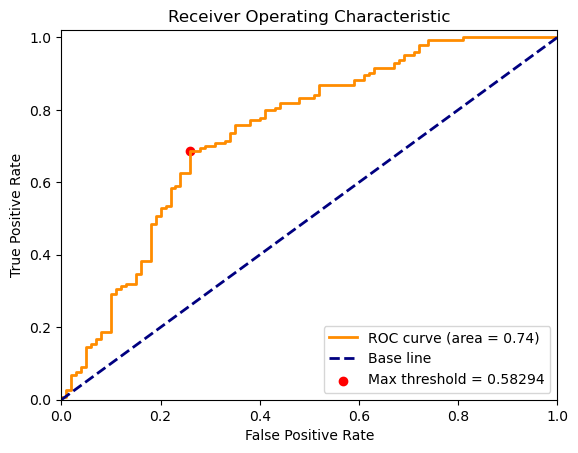

In [45]:
from sklearn.metrics import roc_curve, auc
y_scores = combined_proba[:,1]
y_test_data = np.array(y_test_data)

fpr, tpr, thresholds = roc_curve(y_test_data, y_scores)

roc_auc = auc(fpr, tpr)

max_threshold_ROC = thresholds[np.argmax(tpr-fpr)]

idx = (np.abs(thresholds - max_threshold_ROC)).argmin()


# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Base line')
plt.scatter(fpr[idx], tpr[idx], color='red', label='Max threshold = %0.5f' % max_threshold_ROC)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:

pos_scores = y_scores[y_test_data==1]
neg_scores = y_scores[y_test_data==0]

In [ ]:
neg_scores

In [ ]:
plt.hist(pos_scores)
plt.hist(neg_scores)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Fit a normal distribution to TP_list
mu_x, std_x = np.mean(pos_scores), np.std(pos_scores)

# Plot the PDF of the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
px = norm.pdf(x, mu_x, std_x)
plt.plot(x, px, 'k', linewidth=2, label='TP', c='green')

# Fit a normal distribution to TP_list
mu_y, std_y = np.mean(neg_scores), np.std(neg_scores)

# Plot the PDF of the normal distribution
xmin, xmax = plt.xlim()
y = np.linspace(xmin, xmax, 100)
px = norm.pdf(y, mu_y, std_y)
plt.plot(x, px, 'b', linewidth=2, label='TN', c='red')



# Plot details
plt.title('Normal Distribution of TP and TN')
plt.legend(loc='upper left')
plt.xlabel('Pred proba')
plt.ylabel('Probability density')

plt.show()
